Classificação de registros MNIST


**Importações iniciais**

In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from keras.preprocessing import image

**Leitura da base de dados MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Usando a função ***Shape()*** para verificar a forma dos conjuntos de dados**

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**Conversão dos dados para o TensorFlow realizar a leitura**

*   Função ***reshape***, para remodelar a forma dos dados



In [0]:
features_train = X_train.reshape(X_train.shape[0],
                                 28, 28, 1)

In [0]:
features_test = X_test.reshape(X_test.shape[0],
                               28, 28, 1)

In [0]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

**Modificar a escala dos dados**

*   escala de 0 a 1


In [0]:
features_train /= 255

In [0]:
features_test /= 255

**Variáveis do tipo dummy**

In [0]:
class_train = np_utils.to_categorical(y_train, 10)

In [0]:
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
class_test = np_utils.to_categorical(y_test, 10)

**Estrutura da CNN**

In [0]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))


classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())
classificador.add(BatchNormalization())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, 
                        activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

**Treinamento da Rede Neural**

In [0]:
classificador.fit(features_train, class_train,
                  batch_size = 128, epochs = 5,
                  validation_data=(features_test, class_test), verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 26s - loss: 0.2444 - accuracy: 0.9280 - val_loss: 0.0838 - val_accuracy: 0.9731
Epoch 2/5
 - 25s - loss: 0.0760 - accuracy: 0.9780 - val_loss: 0.0514 - val_accuracy: 0.9832
Epoch 3/5
 - 26s - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0445 - val_accuracy: 0.9843
Epoch 4/5
 - 25s - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0442 - val_accuracy: 0.9854
Epoch 5/5
 - 26s - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0433 - val_accuracy: 0.9857


**Classificação de uma imagem**

Text(0.5, 1.0, 'Class5')

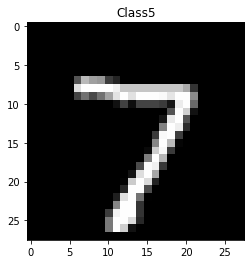

In [0]:
plt.imshow(X_test[0], cmap = 'gray')
plt.title('Class' + str(y_train[0]))

In [0]:
imagem_teste = X_test[0].reshape(1,28,28,1)
imagem_teste = imagem_teste.astype('float32')
imagem_teste /= 255

In [0]:
previsao = classificador.predict(imagem_teste)

In [0]:
import numpy as np
resultado = np.argmax(previsao)

In [0]:
resultado

7